#ATSC 405 Day 8 Assignment
##Bryan Jansens

-----

##Objective: Reproduce Fig. 1.9 from Thompkins for pressures of 1000, 800, and 600 hPa and temperatures from 250 to 300 K.

Fig. 1.9 has two axes: temperature $T$ on the horizontal axis and $ln(\theta)$ on the vertical axis. I can set up the horizontal axis easily enough, but to get the vertical axis I will need to bring in a function that calculates $\theta$ as a function of pressure and temperature. We had one in a previous notebook that I'll use here.

In [33]:
import numpy as np
from matplotlib import pyplot as plt

In [1]:
def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    cpd = 1004. #J/kg/K
    Rd = 287.   # J/kg/K
    p0 = 100    #kPa
    theta = temp*(p0/press)**(Rd/cpd)
    return theta

Now set up the temperature axis between 250 and 300 K.

In [12]:
temps = np.arange(250.0,300.01,0.1)
print(len(temps))

501


Set up an array of pressures of the same size as the temperature array. Use units of kPa to match those from the theta function.

In [80]:
pressures = np.arange(100, 49.9, -0.1)
print(len(pressures))

501


Now get values of $\theta$ corresponding to those pressures and temperatures. Take the logarithm of those values to get my vertical axis.

In [32]:
thetavals = np.log(theta_from_temp(temps, pressures))
print(len(thetavals))

501


Now I want to get curves of constant pressure (isobars) for each of the three given pressures.

In [93]:
pressline1 = theta_from_temp(temps, 100)
pressline2 = theta_from_temp(temps, 80)
pressline3 = theta_from_temp(temps, 60)

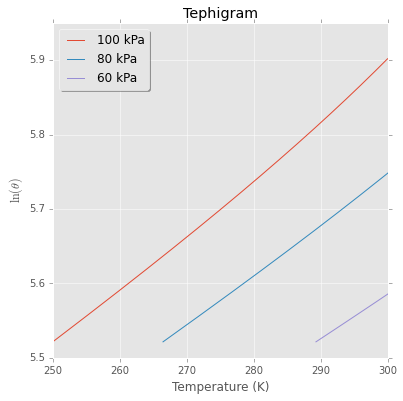

In [100]:
%matplotlib inline
plt.style.use('ggplot')

fig,ax = plt.subplots(1,1,figsize = (6,6))
out = ax.plot(pressline1, thetavals, label = '100 kPa')
out = ax.plot(pressline2, thetavals, label = '80 kPa')
out = ax.plot(pressline3, thetavals, label = '60 kPa')
#out = ax.plot(temps, thetavals)
out = ax.legend(loc = 'best', ncol = 1, fancybox = True, shadow = True)
out = ax.set(xlabel = 'Temperature (K)', ylabel = '$\ln(\\theta)$', title = 'Tephigram')
out = ax.set(xlim=[250, 300])